In [205]:
import requests
import pandas as pd 


In [206]:
df = pd.read_csv("2024-2025-data.csv")
print(df.shape)
df.head()

(118, 67)


,Department,7/1/2024,7/8/2024,7/15/2024,7/22/2024,7/29/2024,8/5/2024,8/12/2024,8/19/2024,8/26/2024,...,8/25/2025,9/1/2025,9/8/2025,9/15/2025,9/22/2025,9/29/2025,10/6/2025,10/13/2025,10/20/2025,10/27/2025
0,Accountancy,25,22,17,17,18,12,4,6,45,...,53,173,217,259,266,231,218,236,249,200
1,Advertising,4,1,4,2,2,0,3,2,36,...,41,148,172,229,304,278,290,320,270,282
2,Aerospace Engineering,12,13,7,10,5,5,5,7,59,...,103,133,120,146,180,193,183,186,116,104
3,African American Studies,1,0,0,0,0,0,0,1,2,...,0,0,1,1,2,0,0,1,3,3
4,Ag Ldrshp Educ Comm Program,1,1,3,1,1,1,1,1,4,...,7,4,3,12,5,7,7,9,3,6


In [207]:
print(df["Department"].unique().size)
df["sum"] = df.sum(axis = 1, numeric_only = True) 
df_sum = df[["Department", "sum"]]
df_sum.head()

118


,Department,sum
0,Accountancy,7829
1,Advertising,8249
2,Aerospace Engineering,4414
3,African American Studies,60
4,Ag Ldrshp Educ Comm Program,449


In [208]:
df_sum.head()

,Department,sum
0,Accountancy,7829
1,Advertising,8249
2,Aerospace Engineering,4414
3,African American Studies,60
4,Ag Ldrshp Educ Comm Program,449


In [209]:
df_mapping = pd.read_csv("dept_college_map.csv")
df_mapping.head()

,Department,CollegeCode,CollegeName
0,Accountancy,BUS,Gies College of Business
1,Advertising,MDIA,College of Media
2,Aerospace Engineering,ENGR,Grainger College of Engineering
3,African American Studies,LAS,College of Liberal Arts & Sciences
4,Ag Ldrshp Educ Comm Program,ACES,"College of Agricultural, Consumer & Environmen..."


In [210]:
df_mapping["CollegeCode"].unique()

array(['BUS', 'MDIA', 'ENGR', 'LAS', 'ACES', 'AHS', 'FAA', 'CI MED',
       'ADMIN', 'VETMED', 'EDUC', 'GRAD', 'IS', 'LAW', 'LER', 'SOCW'],
      dtype=object)

In [211]:
df = df.merge(df_mapping, on="Department", how="left")
name_column = df.pop("CollegeCode")
df.insert(1, "CollegeCode", name_column)
name_column = df.pop("CollegeName")
df.insert(2, "CollegeName", name_column)
df.head()

,Department,CollegeCode,CollegeName,7/1/2024,7/8/2024,7/15/2024,7/22/2024,7/29/2024,8/5/2024,8/12/2024,...,9/1/2025,9/8/2025,9/15/2025,9/22/2025,9/29/2025,10/6/2025,10/13/2025,10/20/2025,10/27/2025,sum
0,Accountancy,BUS,Gies College of Business,25,22,17,17,18,12,4,...,173,217,259,266,231,218,236,249,200,7829
1,Advertising,MDIA,College of Media,4,1,4,2,2,0,3,...,148,172,229,304,278,290,320,270,282,8249
2,Aerospace Engineering,ENGR,Grainger College of Engineering,12,13,7,10,5,5,5,...,133,120,146,180,193,183,186,116,104,4414
3,African American Studies,LAS,College of Liberal Arts & Sciences,1,0,0,0,0,0,0,...,0,1,1,2,0,0,1,3,3,60
4,Ag Ldrshp Educ Comm Program,ACES,"College of Agricultural, Consumer & Environmen...",1,1,3,1,1,1,1,...,4,3,12,5,7,7,9,3,6,449


In [212]:
import matplotlib.pyplot as plt

# Make sure every row has some college label
df["CollegeName"] = df["CollegeName"].fillna("Unknown / Admin")

# 1. Aggregate department totals up to the college level
college_attendance = (
    df.groupby("CollegeName", as_index=False)["sum"]   # "sum" is the column you already created
      .sum()
      .rename(columns={"sum": "TotalVisitors"})
      .sort_values("TotalVisitors", ascending=False)
)

college_attendance

,CollegeName,TotalVisitors
7,College of Liberal Arts & Sciences,62443
12,Grainger College of Engineering,49383
10,Gies College of Business,34192
5,College of Fine & Applied Arts,28435
3,College of Applied Health Sciences,14973
2,"College of Agricultural, Consumer & Environmen...",12677
0,Campus Administration / Non-College Unit,11390
8,College of Media,10212
13,School of Information Sciences,6737
4,College of Education,6240


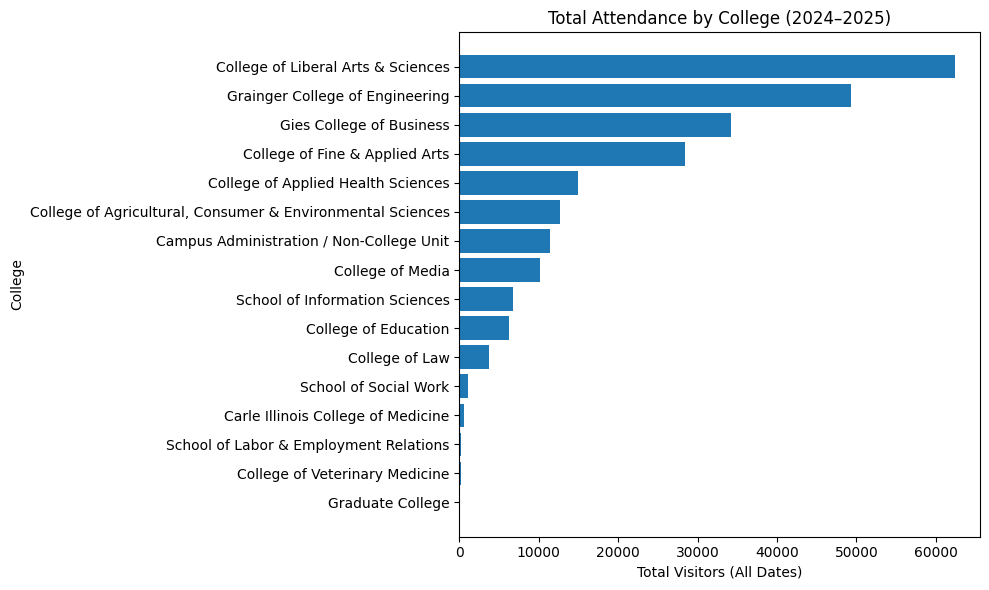

In [213]:
plt.figure(figsize=(10, 6))

plt.barh(
    college_attendance["CollegeName"],
    college_attendance["TotalVisitors"]
)

plt.xlabel("Total Visitors (All Dates)")
plt.ylabel("College")
plt.title("Total Attendance by College (2024–2025)")
plt.gca().invert_yaxis()  # biggest bar at the top
plt.tight_layout()
plt.show()

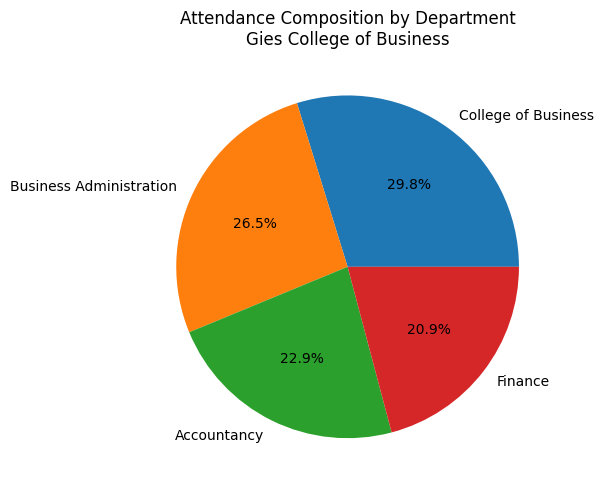

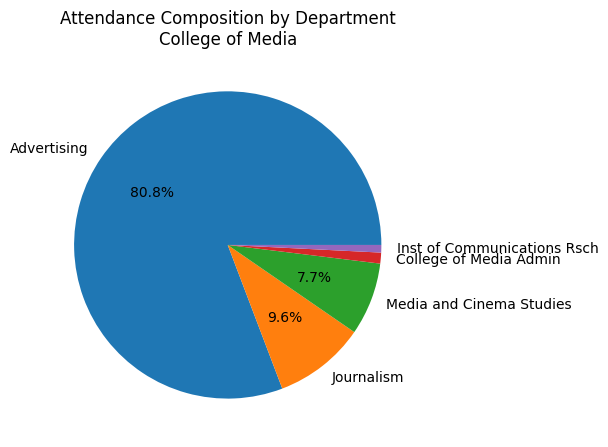

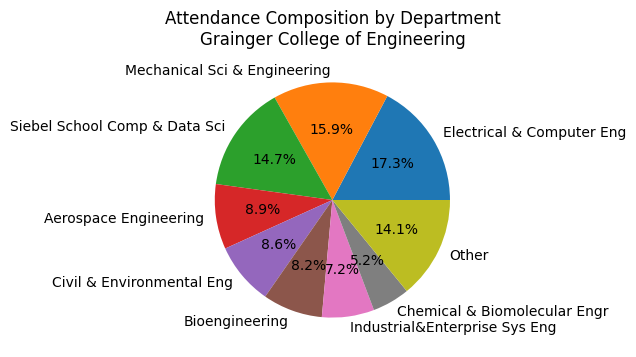

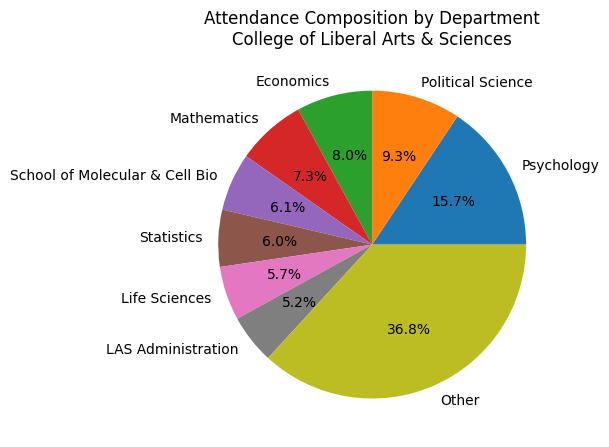

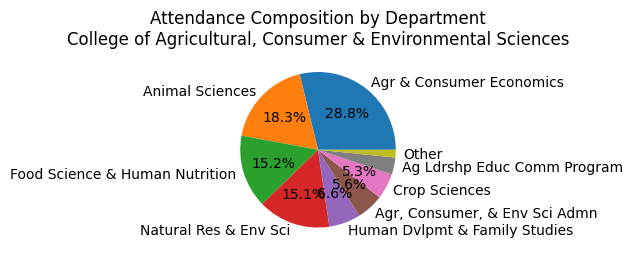

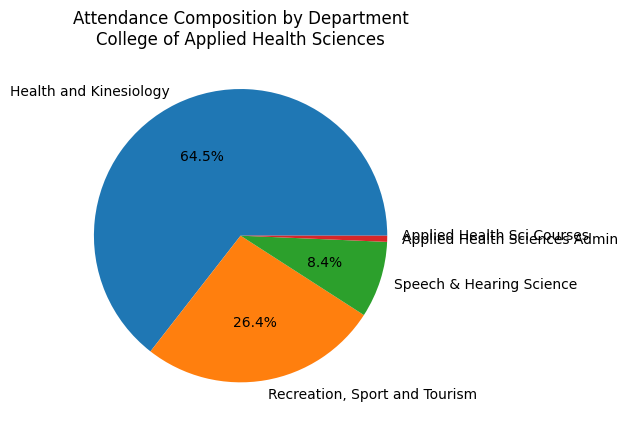

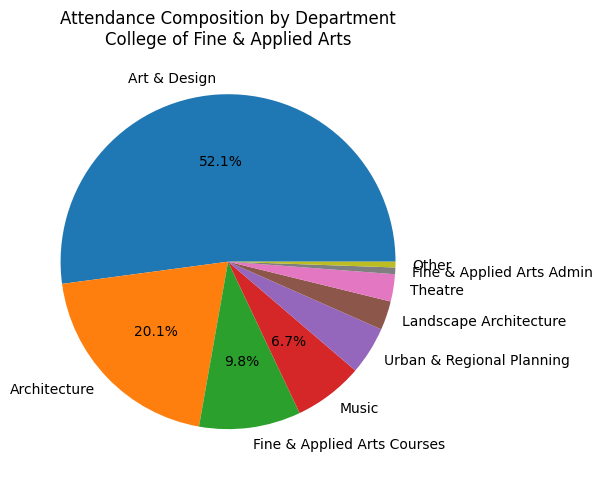

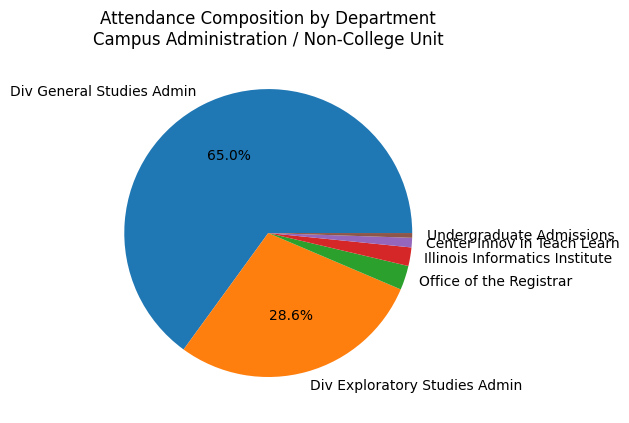

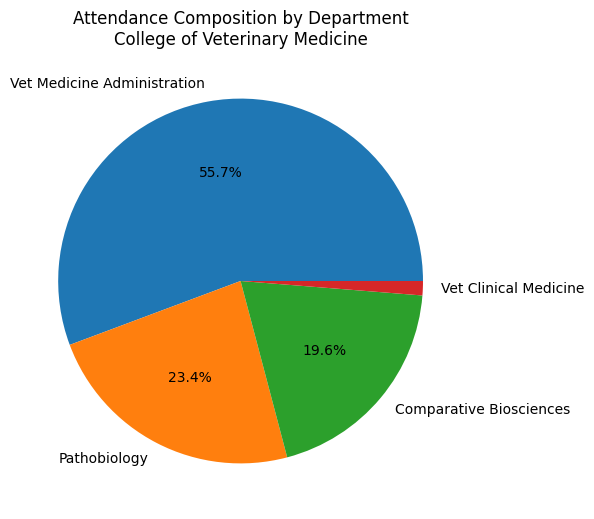

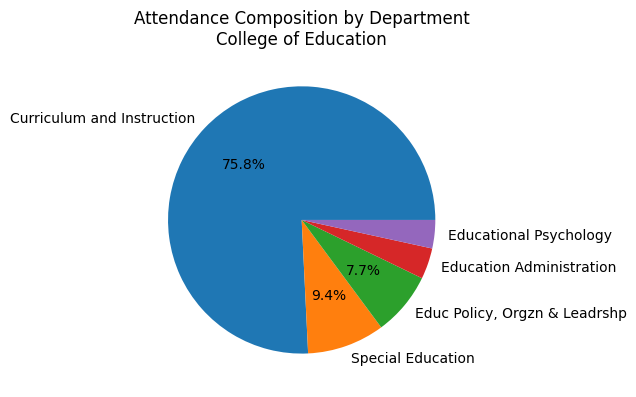

In [214]:
df["CollegeName"] = df["CollegeName"].fillna("Unknown / Admin")

colleges = df["CollegeName"].unique()

for college in colleges:
    # 1) Filter to one college
    df_col = df[df["CollegeName"] == college]
    
    # 2) Sum attendance by department
    dept_attendance = (
        df_col
        .groupby("Department", as_index=False)["sum"]   # "sum" is your total visitors per dept
        .sum()
        .sort_values("sum", ascending=False)
    )
    
    # If there's only 1 department, skip (no real composition to show)
    if len(dept_attendance) <= 1:
        continue
    
    # 3) Optional: keep top N departments and group the rest into "Other"
    N = 8  # tweak this if you want more or fewer slices
    if len(dept_attendance) > N:
        top = dept_attendance.iloc[:N].copy()
        others_total = dept_attendance.iloc[N:]["sum"].sum()
        top = pd.concat(
            [top, pd.DataFrame([{"Department": "Other", "sum": others_total}])],
            ignore_index=True
        )
        dept_attendance = top
    
    # 4) Build the pie chart
    sizes = dept_attendance["sum"].values
    labels = dept_attendance["Department"].values
    
    # Only show a % label if the slice is at least 5%
    def autopct_func(pct):
        return f"{pct:.1f}%" if pct >= 5 else ""
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        sizes,
        labels=labels,
        autopct=autopct_func,
    )
    plt.title(f"Attendance Composition by Department\n{college}")
    plt.tight_layout()
    plt.show()

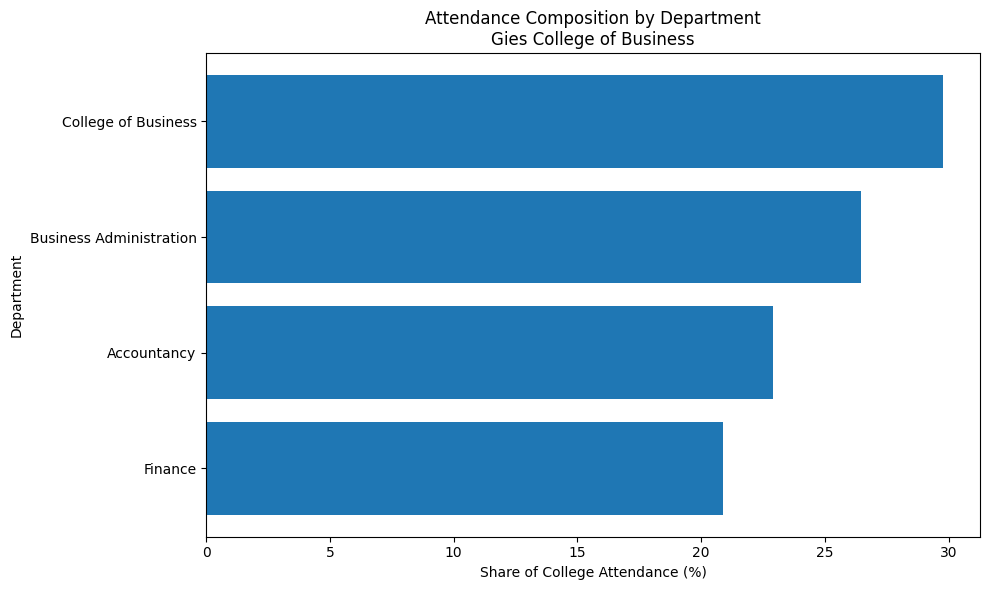

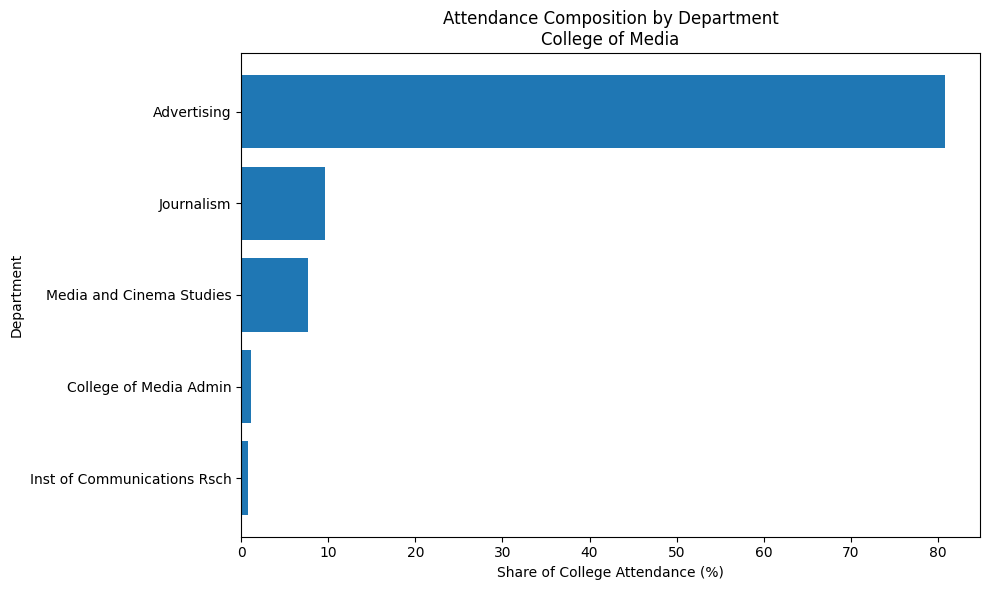

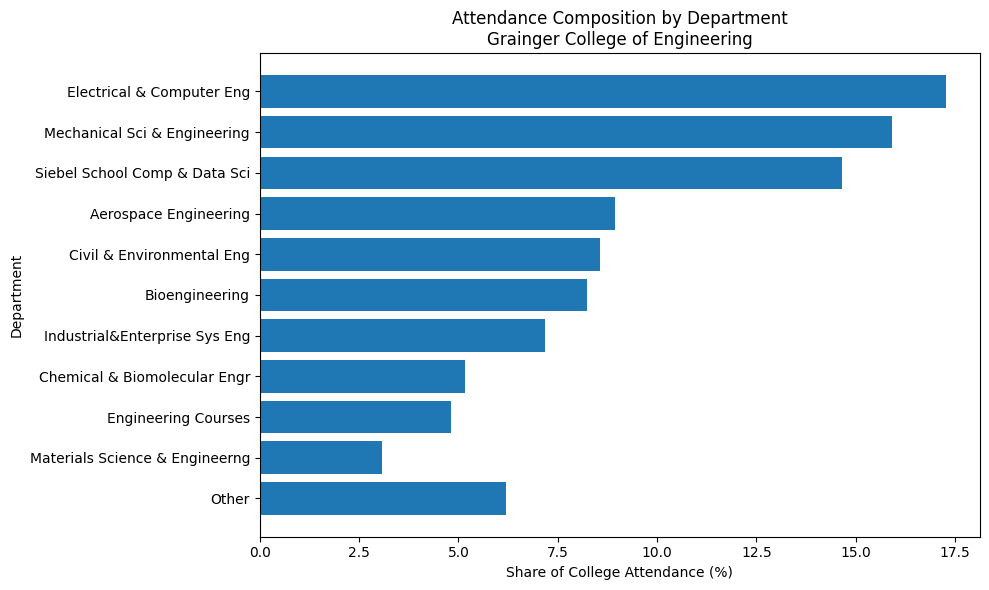

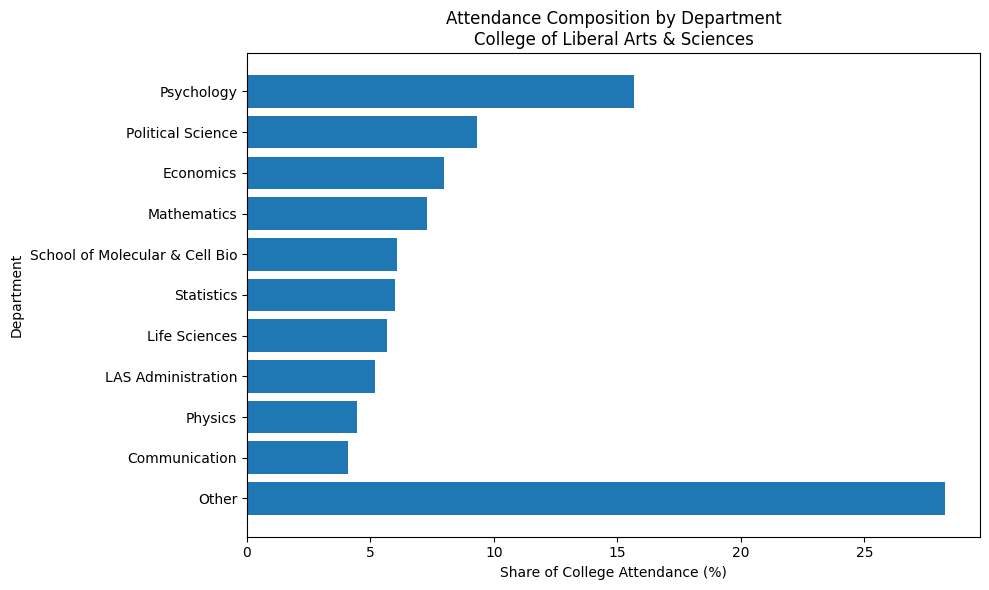

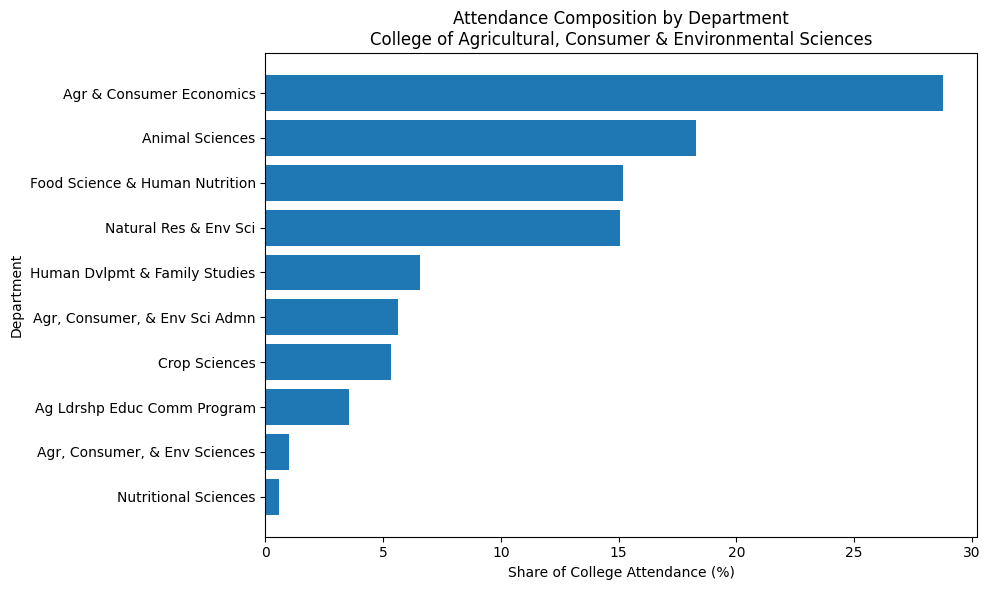

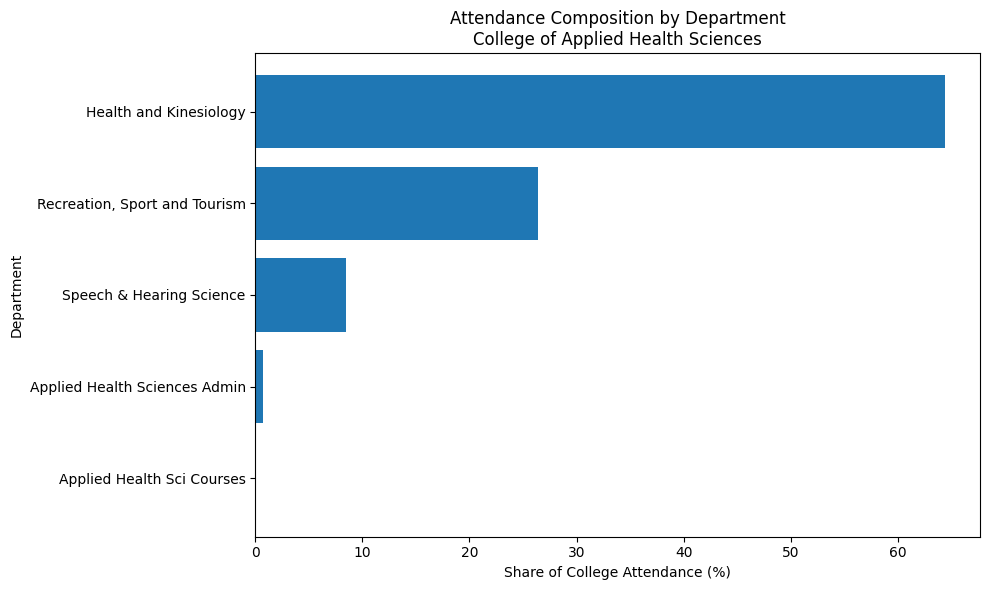

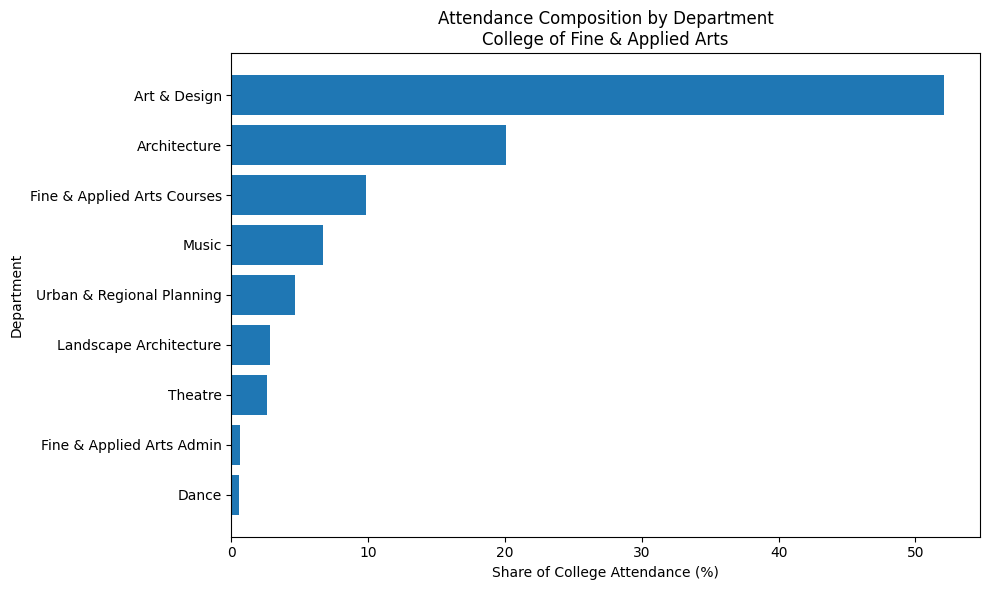

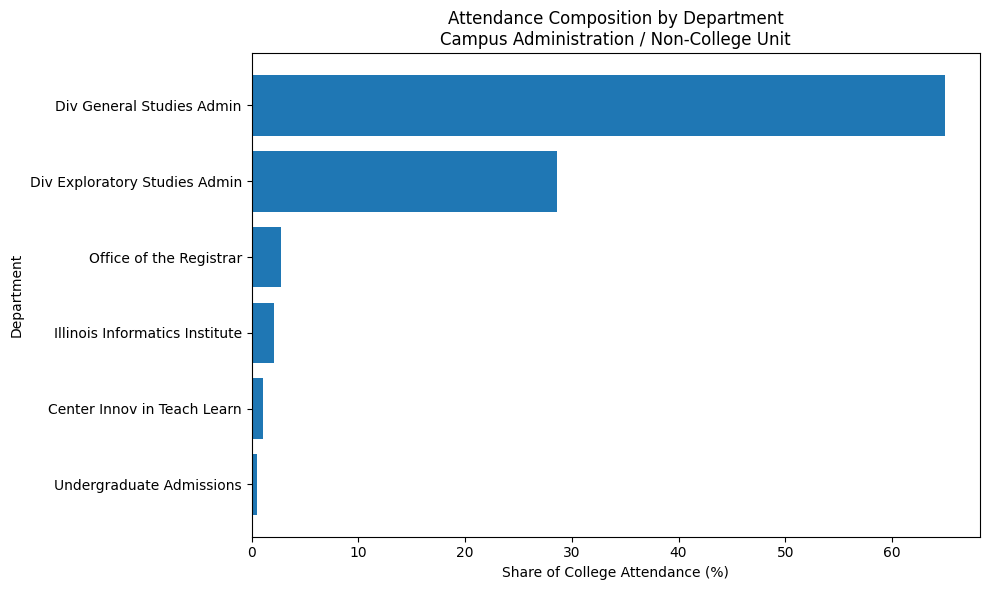

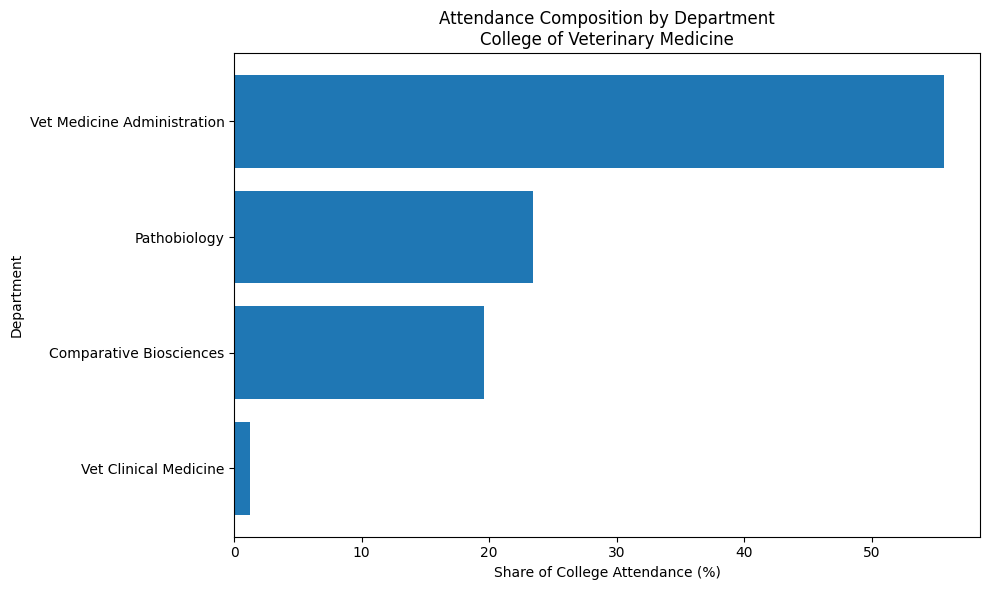

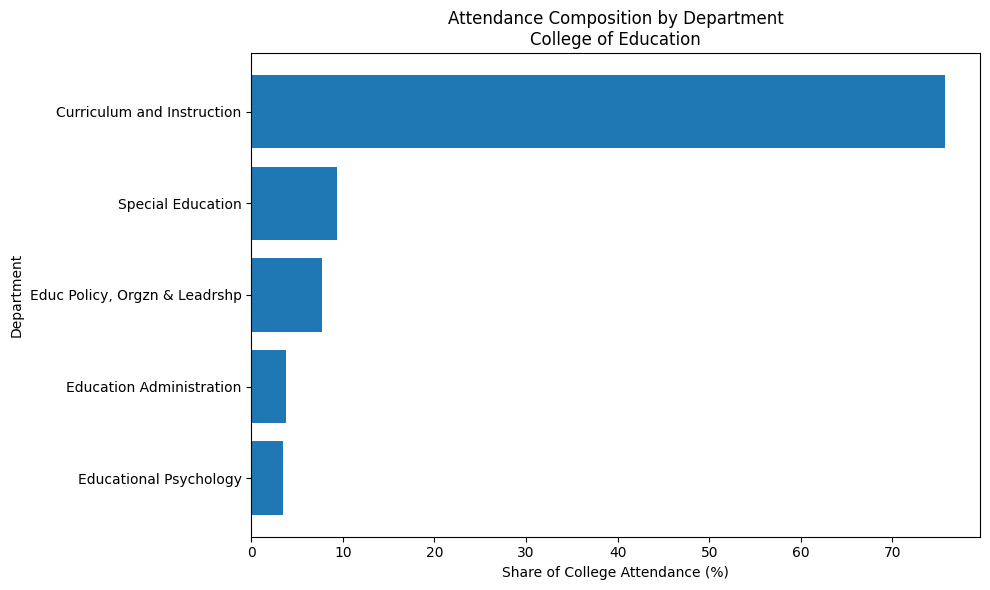

In [215]:
df["CollegeName"] = df["CollegeName"].fillna("Unknown / Admin")

colleges = df["CollegeName"].unique()

for college in colleges:
    # 1) Filter rows for this college
    df_col = df[df["CollegeName"] == college]
    
    # 2) Aggregate attendance by department within this college
    dept_attendance = (
        df_col
        .groupby("Department", as_index=False)["sum"]
        .sum()
        .rename(columns={"sum": "TotalVisitors"})
        .sort_values("TotalVisitors", ascending=False)
    )
    
    # If this college only has one department in the data, skip plotting
    if len(dept_attendance) <= 1:
        continue
    
    # 3) Optional: keep only top N departments, group rest into "Other"
    N = 10  # adjust as you like
    if len(dept_attendance) > N:
        top = dept_attendance.iloc[:N].copy()
        others_total = dept_attendance.iloc[N:]["TotalVisitors"].sum()
        top = pd.concat(
            [top, pd.DataFrame([{"Department": "Other", "TotalVisitors": others_total}])],
            ignore_index=True
        )
        dept_attendance = top
    
    # 4) Compute percent of college attendance for each department
    total_college_visitors = dept_attendance["TotalVisitors"].sum()
    dept_attendance["Percent"] = (
        dept_attendance["TotalVisitors"] / total_college_visitors * 100
    )
    
    # 5) Make a bar chart for this college
    plt.figure(figsize=(10, 6))
    plt.barh(
        dept_attendance["Department"],
        dept_attendance["Percent"]
    )
    
    plt.xlabel("Share of College Attendance (%)")
    plt.ylabel("Department")
    plt.title(f"Attendance Composition by Department\n{college}")
    plt.gca().invert_yaxis()  # largest share at the top
    plt.tight_layout()
    plt.show()

***

## Old Stuff Below IGNORE

In [216]:
df_colleges = pd.read_csv("degree-college.csv")
df_colleges.columns = ["Degree", "College"]
df_colleges.head()

,Degree,College
0,Adult Development,ACES
1,Agri-Accounting,ACES
2,Agribusiness Markets & Management,ACES
3,Agribusiness and Sustainable Food Production E...,ACES
4,Agricultural & Applied Economics,ACES


In [217]:
import re 
def clean_text(s: str) -> str: 
    if pd.isna(s) : 
        return ""
    s = s.lower()
    s = s.replace("&", "and")
    s = re.sub(r'[^a-z0-9\s]', " ", s)
    s = re.sub(r'\s+', " ", s).strip()
    return s


In [218]:
df["cleaned_department"] = df["Department"].apply(clean_text)
df_colleges["cleaned_degree"] = df_colleges["Degree"].apply(clean_text)


In [219]:
from rapidfuzz import process, fuzz

degree_choices = df_colleges["Degree"].unique().tolist()

def best_degree_match(cleaned_department: str, cutoff: int = 80): 
    if not cleaned_department: 
        return None
    match = process.extractOne(
        cleaned_department, 
        degree_choices, 
        scorer = fuzz.token_set_ratio, 
        score_cutoff = cutoff
    )
    if match is None: 
        return None
    # tuple unpacking for output of match; "_" gets the index value which doesn't matter
    best_str, best_score, _ = match
    return best_str
df["degree_college_match"] = df["cleaned_department"].apply(best_degree_match)
